In [2]:
import pandas as pd
import numpy as np
import sklearn
import cv2
import mediapipe as mp

In [28]:
def record(image):
    face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    #listin_viz=[]
    listin=[]
    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]

    results = face_mesh.process(image)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                listin.append(i.landmark[j].x)
                listin.append(i.landmark[j].y)
    return listin

In [16]:
def get_input():

    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]
    cap = cv2.VideoCapture(0)
    face_detection = mp.solutions.face_detection.FaceDetection()
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    t_all=[]

    success, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame_rgb)

    if results.detections:
        for detection in results.detections:
            bounding_box = detection.location_data.relative_bounding_box
            x = int(bounding_box.xmin * frame.shape[1])
            y = int(bounding_box.ymin * frame.shape[0])
            w = int(bounding_box.width * frame.shape[1])
            h = int(bounding_box.height * frame.shape[0])
    else:
        print("bounding box detection failed")

    crop_img = frame[y-30:y+h+10, x-20:x+w+20]

    rgb_frame = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in range(len(i.landmark)):
                t_all.append(i.landmark[j].x)
                t_all.append(i.landmark[j].y)
    else:
        print("feature detection failed")
                
    cap.release()
    return t_all, crop_img

In [8]:
df=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\degree regression\\ud_train_crop_some.csv')
print(df)
df_test=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\degree regression\\ud_test_crop_some.csv')
print(df_test)

             1         2         3         4         5         6         7  \
0     0.497830  0.656260  0.494323  0.513745  0.495441  0.557862  0.492878   
1     0.512213  0.657584  0.506015  0.512097  0.507847  0.555619  0.504144   
2     0.507781  0.652140  0.505115  0.504953  0.506331  0.549895  0.503767   
3     0.511148  0.647941  0.508560  0.497830  0.509264  0.544724  0.506988   
4     0.508443  0.633382  0.508592  0.483023  0.508474  0.529388  0.507587   
...        ...       ...       ...       ...       ...       ...       ...   
1211  0.526105  0.949865  0.517949  0.882144  0.521556  0.878795  0.516323   
1212  0.528318  0.962804  0.524837  0.898697  0.526393  0.893266  0.523714   
1213  0.529773  0.952597  0.523098  0.888213  0.526591  0.883398  0.521546   
1214  0.528808  0.955249  0.525107  0.891124  0.527078  0.886299  0.523978   
1215  0.523846  0.954756  0.519484  0.893721  0.522115  0.887746  0.518313   

             8         9        10  ...       256       257    

In [19]:
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
933       0
934       0
935       0
936       0
degree    0
Length: 937, dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [6]:
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [21]:
df_test=df_test.dropna().reset_index(drop=True)
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

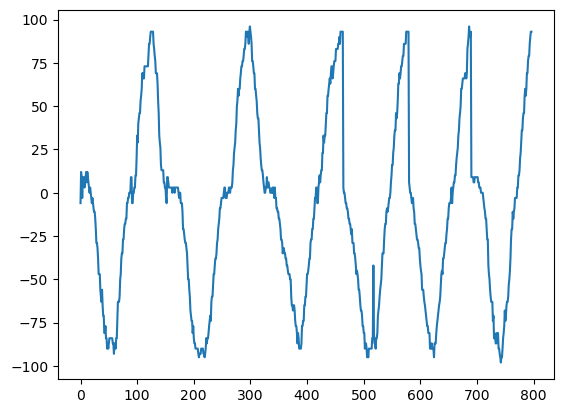

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(len(df['1'].tolist())),df['degree'].tolist())
plt.show()

In [9]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
print(X,X.shape)
print(Y,Y.shape)

X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values
print(X_test,X_test.shape)
print(Y_test,Y_test.shape)

[[0.4978303  0.65625977 0.49432257 ... 0.41153565 0.75298393 0.29566657]
 [0.51221347 0.65758413 0.50601524 ... 0.4021084  0.7635411  0.28980502]
 [0.50778091 0.65214044 0.50511539 ... 0.40236026 0.76838255 0.28545696]
 ...
 [0.52977312 0.95259726 0.52309793 ... 0.45734411 0.77072442 0.51692104]
 [0.52880847 0.95524919 0.52510714 ... 0.46256795 0.76840377 0.52138734]
 [0.52384633 0.95475566 0.51948357 ... 0.45820761 0.76998508 0.52111095]] (1216, 264)
[ -2  -3  -5 ... 123 124 125] (1216,)
[[0.48429856 0.66992796 0.48047069 ... 0.4329434  0.74278605 0.31954688]
 [0.48016667 0.67890334 0.47700781 ... 0.43449101 0.7389344  0.32433224]
 [0.48000699 0.67575985 0.47632217 ... 0.4327507  0.7371003  0.32100272]
 ...
 [0.50337106 0.89150721 0.49255377 ... 0.429115   0.78627539 0.48858571]
 [0.4973036  0.8889178  0.48557392 ... 0.41415757 0.77440757 0.48006666]
 [0.49743932 0.894683   0.48107669 ... 0.41885573 0.76699048 0.49101904]] (290, 264)
[   4    8    7    8    8    9    8   10    5    3 

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
print(np.concatenate((Y_test.reshape(len(Y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[   4.            3.70823059]
 [   8.            7.76439053]
 [   7.            7.09159156]
 [   8.            8.32072408]
 [   8.            7.7103071 ]
 [   9.            9.1275216 ]
 [   8.            7.59551837]
 [  10.           10.04484627]
 [   5.            5.2617928 ]
 [   3.            3.37258231]
 [   7.            7.15800842]
 [   8.            7.78299846]
 [   7.            6.70726119]
 [   7.            7.24443014]
 [   6.            6.1060437 ]
 [   7.            7.43043572]
 [   6.            5.70762333]
 [   7.            6.67811327]
 [   6.            5.77228057]
 [   4.            4.32076439]
 [   5.            5.43977683]
 [   6.            6.26324981]
 [   6.            6.14392909]
 [   5.            4.72481938]
 [   5.            5.04167491]
 [   3.            3.36924802]
 [   3.            3.16618844]
 [   3.            2.86546075]
 [   3.            3.43059419]
 [   4.            3.51856835]
 [   5.            4.66967111]
 [   2.            1.90640886]
 [   4. 

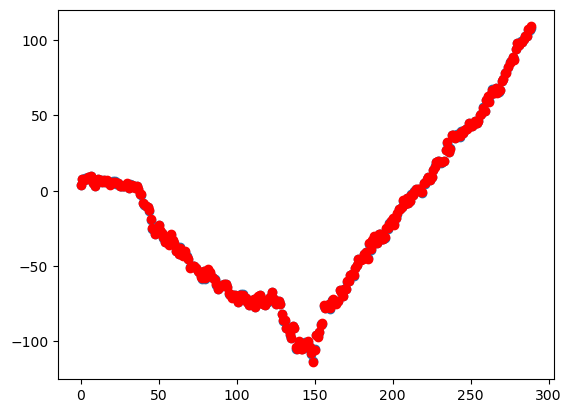

In [12]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), Y_test, color='red')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2) 

mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

mse = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mse)

R-squared: 0.9999602703999202
Mean Squared Error: 0.1125797982728169
Mean Absolute Error: 0.2771954210696277


In [25]:
#tilt
listin,frame=get_input()
if len(listin)==0:
    raise Exception("input is empty")
y_pred = regressor.predict([listin])
print("Predicted degree:",y_pred)
print("Input (",len(listin),"):")
print(listin)
cv2.imshow('Face Detection', cv2.flip(frame, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\RS7un\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Predicted degree: [13.81584535]
Input ( 936 ):
[0.5061976313591003, 0.6570032835006714, 0.5018435716629028, 0.5304714441299438, 0.5030143857002258, 0.5691226124763489, 0.46377915143966675, 0.42254412174224854, 0.4999203383922577, 0.4953235685825348, 0.49742984771728516, 0.4510645568370819, 0.4913691282272339, 0.3454574942588806, 0.2309730350971222, 0.3604557514190674, 0.48617273569107056, 0.25937801599502563, 0.48375093936920166, 0.21361878514289856, 0.47558897733688354, 0.06858417391777039, 0.5071219205856323, 0.6757233738899231, 0.5079361796379089, 0.6909775733947754, 0.5084459781646729, 0.6981635093688965, 0.5143516659736633, 0.769015908241272, 0.5158827304840088, 0.7891181707382202, 0.5173887610435486, 0.8120140433311462, 0.5189229249954224, 0.8336477279663086, 0.5206688642501831, 0.8505958318710327, 0.5023801326751709, 0.5487923622131348, 0.4673489034175873, 0.5493592023849487, 0.11817032098770142, 0.25149163603782654, 0.33673763275146484, 0.3838856816291809, 0.30213412642478943, 

In [ ]:
import time

cap = cv2.VideoCapture(0)
face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.75)
while cap.isOpened():
    success, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    listin=[]
    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]
    results = face_mesh.process(frame_rgb)
    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                listin.append(i.landmark[j].x)
                listin.append(i.landmark[j].y)
    
    #print(listin)
    
    y_pred = int(regressor.predict([listin]))
    
    mirrored_frame = cv2.flip(frame, 1)
    cv2.putText(mirrored_frame, f"turn: {y_pred:.2f}", (30, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Face Detection', frame)
    time.sleep(1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\RS7un\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\RS7un\AppData\Local\Temp\ipykernel_41280\2180822776.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = int(regressor.predict([listin]))
C:\Users\RS7un\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\RS7un\AppData\Local\Temp